# Question 2. 
### As a member of the retail analytics team, you have been contacted by the Category Manager at a retail store, who desires to gain a deeper understanding of the customers who buy chips and their purchasing habits within the region through valuable insights that will eventually be used to inform the store’s strategic plan for the chip category in the upcoming six months.
### You have received the following e-mail from your manager.
_Greetings!_
_I am following up on our earlier conversation with a few pointers to help you succeed in this task. Here are the key areas you will be working on and what we're looking for in each one:_

_Firstly, examine the transaction data (“transaction_data“ file) and look for inconsistencies, missing data, outliers, correctly identify category items, and numeric data across all tables. If you notice any anomalies, please make the necessary changes in the dataset and save it for further analysis. Having clean data will make it easier for us to conduct an effective analysis._

_Secondly, examine the customer data (“purchase_behaviour” file) for similar issues and check for null values. Once you're satisfied with the data, merge the transaction and customer data together for analysis, ensuring that you save your files along the way._

_Thirdly, conduct data analysis and identify customer segments. Define the metrics, such as total sales, drivers of sales, and the source of the highest sales. Explore the data, create charts and graphs, and note any interesting trends and insights you find._
_Finally, deep dive into customer segments and recommend which segments we should target. Determine if packet sizes are relative and form an overall conclusion based on your analysis._

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import simple_colors

from sklearn.linear_model import LinearRegression

In [2]:
dftd = pd.read_excel("E:/WPI/Fall_2024/CS539_MachineLearning/Assignments/1/datasets/2_transaction_and_purchase_behavior/transaction_data.xlsx")

### _A. Firstly, examine the transaction data (“transaction_data“ file) and look for inconsistencies, missing data, outliers, correctly identify category items, and numeric data across all tables. If you notice any anomalies, please make the necessary changes in the dataset and save it for further analysis. Having clean data will make it easier for us to conduct an effective analysis._
### Data Cleaning:

In [3]:
print(dftd.describe())

                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

In [4]:
print(dftd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None


In [5]:
dftd['DATE'] = pd.to_datetime(dftd['DATE'])
dftd['LYLTY_CARD_NBR'] = dftd['LYLTY_CARD_NBR'].astype(str)
dftd['TXN_ID'] = dftd['TXN_ID'].astype(str)
dftd['PROD_NBR'] = dftd['PROD_NBR'].astype(str)
dftd['STORE_NBR'] = dftd['STORE_NBR'].astype(str)

dftd['STORE_NBR'] = dftd['STORE_NBR'].str.strip().str.lower()
dftd['LYLTY_CARD_NBR'] = dftd['LYLTY_CARD_NBR'].str.strip().str.lower()
dftd['TXN_ID'] = dftd['TXN_ID'].str.strip().str.lower()
dftd['PROD_NBR'] = dftd['PROD_NBR'].str.strip().str.lower()

In [67]:
#checking for duplicates
duplicates = dftd.duplicated().sum()
print(duplicates)

1


In [68]:
#Rectifying duplicates
dftd_cleaned1 = dftd.drop_duplicates()

#checking for missing values
print(dftd_cleaned1.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [8]:
#Checking for unique names
prod_names = dftd_cleaned1['PROD_NAME'].unique()
print(prod_names)

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [9]:
print(dftd_cleaned1['PROD_NAME'].value_counts())

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64


Outliers in TOT_SALES:
                               DATE STORE_NBR LYLTY_CARD_NBR  TXN_ID PROD_NBR  \
69762 1970-01-01 00:00:00.000043331       226         226000  226201        4   
69763 1970-01-01 00:00:00.000043605       226         226000  226210        4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


Text(0.5, 1.0, 'Box Plot - Total Sales')

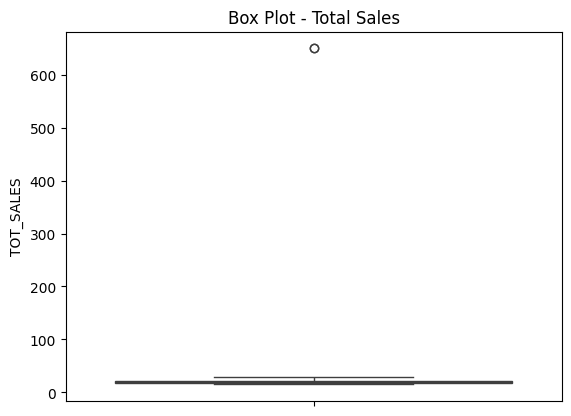

In [65]:
#Detecting outliers
Q1 = dftd_cleaned1['TOT_SALES'].quantile(0.25)
Q3 = dftd_cleaned1['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1
outliers = dftd_cleaned1[(dftd_cleaned1['TOT_SALES'] < (Q1 - 1.5 * IQR)) | (dftd_cleaned1['TOT_SALES'] > (Q3 + 1.5 * IQR))]
print("Outliers in TOT_SALES:")
print(outliers)

sns.boxplot(dftd_cleaned1['TOT_SALES'])
plt.title('Box Plot - Total Sales')

In [11]:
#There seems to be a sale above 600, seems to be an outlier, let's check it out
outlier_max_sale = dftd_cleaned1['TOT_SALES'].max()
print('Maximum Total Sales:', outlier_max_sale)

Maximum Total Sales: 650.0


In [12]:
data_outlier_max_sale = dftd_cleaned1[dftd_cleaned1['TOT_SALES']==outlier_max_sale]
print(data_outlier_max_sale)

                               DATE STORE_NBR LYLTY_CARD_NBR  TXN_ID PROD_NBR  \
69762 1970-01-01 00:00:00.000043331       226         226000  226201        4   
69763 1970-01-01 00:00:00.000043605       226         226000  226210        4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [13]:
lycn226000 = '226000'
data_lycn226000 = dftd_cleaned1[dftd_cleaned1['LYLTY_CARD_NBR']==lycn226000]
print(data_lycn226000)

                               DATE STORE_NBR LYLTY_CARD_NBR  TXN_ID PROD_NBR  \
69762 1970-01-01 00:00:00.000043331       226         226000  226201        4   
69763 1970-01-01 00:00:00.000043605       226         226000  226210        4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [14]:
prodnum4 = '4'
data_prodnum4 = dftd_cleaned1[dftd_cleaned1['PROD_NBR']==prodnum4]
print(data_prodnum4)

                                DATE STORE_NBR LYLTY_CARD_NBR  TXN_ID  \
41     1970-01-01 00:00:00.000043605        55          55073   48887   
67     1970-01-01 00:00:00.000043328        83          83186   83162   
157    1970-01-01 00:00:00.000043599       212         212203  211586   
199    1970-01-01 00:00:00.000043330       269         269175  266095   
236    1970-01-01 00:00:00.000043407         3           3164    1779   
...                              ...       ...            ...     ...   
264457 1970-01-01 00:00:00.000043337       255         255218  254791   
264470 1970-01-01 00:00:00.000043318       255         255470  255094   
264536 1970-01-01 00:00:00.000043379       259         259056  257776   
264584 1970-01-01 00:00:00.000043336       261         261292  260939   
264807 1970-01-01 00:00:00.000043484       271         271013  268302   

       PROD_NBR                         PROD_NAME  PROD_QTY  TOT_SALES  
41            4  Dorito Corn Chp     Supreme 380g 

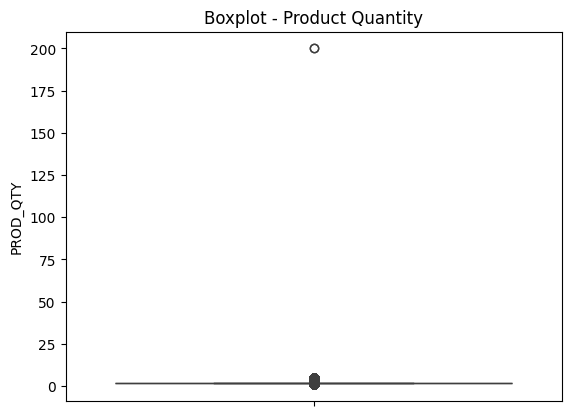

In [15]:
sns.boxplot(dftd_cleaned1['PROD_QTY'])
plt.title('Boxplot - Product Quantity')
plt.show()

_The number adds up correctly, for product number 4 to be of 650, if 200 were bought. Can check with the Manager if Loyalty Card Number 226000 is an outlier or not with all the details._

_Data seems to be clean._
### B. Secondly, examine the customer data (“purchase_behaviour” file) for similar issues and check for null values. Once you're satisfied with the data, merge the transaction and customer data together for analysis, ensuring that you save your files along the way.
### Understanding purchase_behaviour and Data Cleaning

In [16]:
dfpb = pd.read_csv("E:/WPI/Fall_2024/CS539_MachineLearning/Assignments/1/datasets/2_transaction_and_purchase_behavior/purchase_behaviour.csv")
print(dfpb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [17]:
#checking for duplicates
duplicates_pb = dfpb.duplicated().sum()
print("Duplicates:", duplicates_pb)

#checking for missing values
print("Missing values:")
print(dfpb.isnull().sum())

Duplicates: 0
Missing values:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [18]:
dfpb_cleaned = dfpb.copy()
dfpb_cleaned['LYLTY_CARD_NBR'] = dfpb_cleaned['LYLTY_CARD_NBR'].astype(str)
dfpb_cleaned['LIFESTAGE'] = dfpb_cleaned['LIFESTAGE'].astype('category')
dfpb_cleaned['PREMIUM_CUSTOMER'] = dfpb_cleaned['PREMIUM_CUSTOMER'].astype('category')

dfpb_cleaned['LIFESTAGE'] = dfpb_cleaned['LIFESTAGE'].str.strip().str.lower()
dfpb_cleaned['PREMIUM_CUSTOMER'] = dfpb_cleaned['PREMIUM_CUSTOMER'].str.strip().str.lower()

In [19]:
print(dfpb_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  object
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [20]:
#identifying unique fields
lcn = dfpb_cleaned['LYLTY_CARD_NBR'].unique()
print('Loyalty Card Numbers:', lcn)

lifestages = dfpb_cleaned['LIFESTAGE'].unique()
print('Lifestages:', lifestages)

prem_cust = dfpb_cleaned['PREMIUM_CUSTOMER'].unique()
print('Premium Customer:', prem_cust)

Loyalty Card Numbers: ['1000' '1002' '1003' ... '2370751' '2370961' '2373711']
Lifestages: ['young singles/couples' 'young families' 'older singles/couples'
 'midage singles/couples' 'new families' 'older families' 'retirees']
Premium Customer: ['premium' 'mainstream' 'budget']


In [21]:
print(dfpb_cleaned.describe())

       LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
count           72637     72637            72637
unique          72637         7                3
top           2373711  retirees       mainstream
freq                1     14805            29245


_Data seems to be clean_
### Merging the Data and Analysis:

### Thirdly, conduct data analysis and identify customer segments. Define the metrics, such as total sales, drivers of sales, and the source of the highest sales. Explore the data, create charts and graphs, and note any interesting trends and insights you find.

### Finally, deep dive into customer segments and recommend which segments we should target. Determine if packet sizes are relative and form an overall conclusion based on your analysis.

In [22]:
merged = pd.merge(dftd_cleaned1, dfpb_cleaned, left_on="LYLTY_CARD_NBR", right_on="LYLTY_CARD_NBR", how='inner')
print(merged.duplicated().sum())

0


In [23]:
#Key Metrics
#Calculating Total and Average sales
total_sales = merged['TOT_SALES'].sum()
print(f'Total Sales:{total_sales}')
average_sale_per_customer = merged.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().mean()
print(f'Average sale per customer: {average_sale_per_customer}')
average_sale_per_transaction = merged.groupby('TXN_ID')['TOT_SALES'].sum().mean()
print(f'Average sale per transaction: {average_sale_per_transaction}')
average_sale_per_store = merged.groupby('STORE_NBR')['TOT_SALES'].sum().mean()
print(f'Average sale per store: {average_sale_per_store}')

Total Sales:1934408.9999999998
Average sale per customer: 26.631179701804864
Average sale per transaction: 7.351617279868655
Average sale per store: 7111.797794117647


                LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6          older families           budget  168363.25
19  young singles/couples       mainstream  157621.60
13               retirees       mainstream  155677.05
15         young families           budget  139345.85
9   older singles/couples           budget  136769.80
10  older singles/couples       mainstream  133393.80
11  older singles/couples          premium  132257.15
12               retirees           budget  113147.80
7          older families       mainstream  103445.55
14               retirees          premium   97646.05


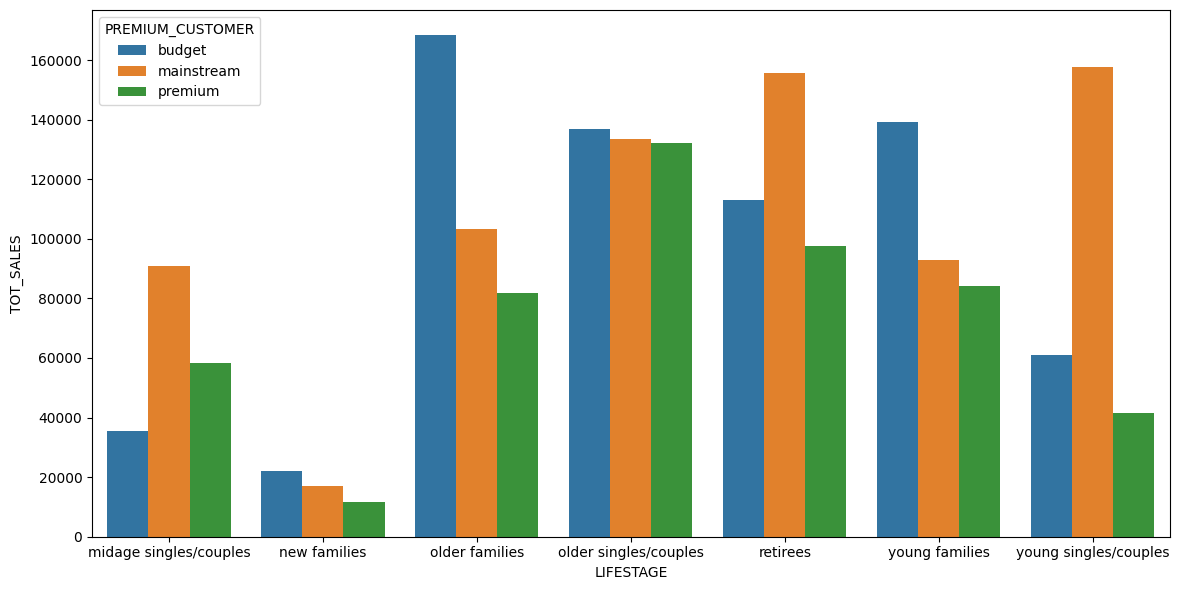

In [87]:
sales_by_lifestage_premium = merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
top_10 = sales_by_lifestage_premium.nlargest(10, 'TOT_SALES')
print(top_10)
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_lifestage_premium, x='LIFESTAGE', y="TOT_SALES", hue='PREMIUM_CUSTOMER')
plt.tight_layout()
plt.show()

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
1   midage singles/couples       mainstream   7.647284
19   young singles/couples       mainstream   7.558339
14                retirees          premium   7.456174
11   older singles/couples          premium   7.449848
12                retirees           budget   7.443445
9    older singles/couples           budget   7.430315
8           older families          premium   7.322945
4             new families       mainstream   7.317806
3             new families           budget   7.297321
15          young families           budget   7.287201


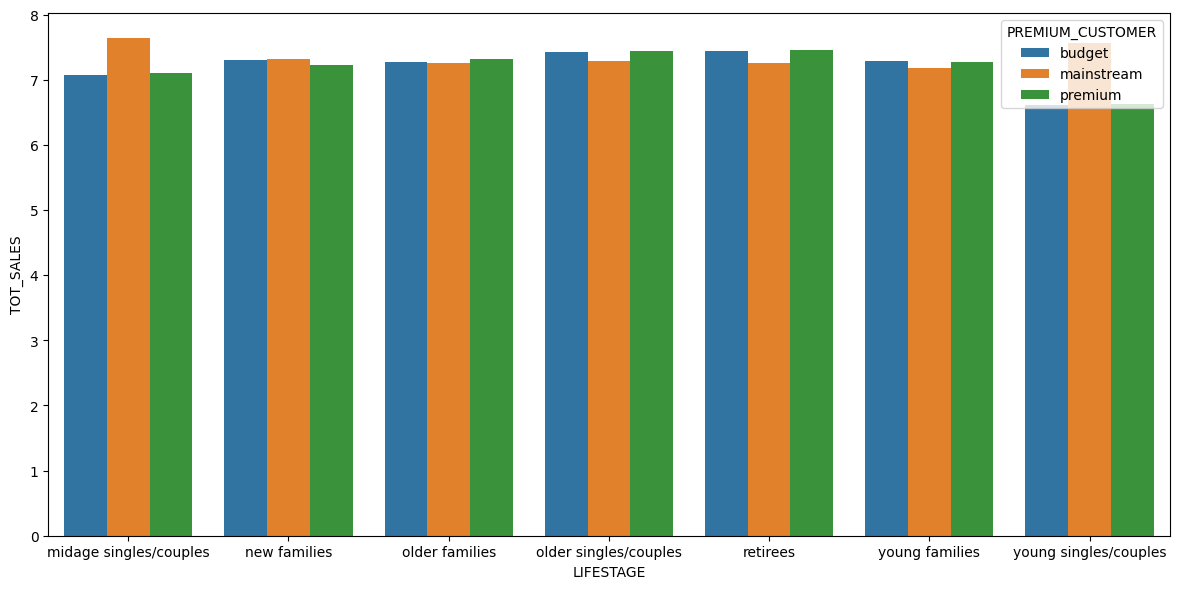

In [89]:
avg_sales_by_lifestage_premium = merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()
top_10 = avg_sales_by_lifestage_premium.nlargest(10, 'TOT_SALES')
print(top_10)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_sales_by_lifestage_premium, x='LIFESTAGE', y="TOT_SALES", hue='PREMIUM_CUSTOMER')
plt.tight_layout()
plt.show()

                                  PROD_NAME  TOT_SALES
0                         Burger Rings 220g     6831.0
1                  CCs Nacho Cheese    175g     5961.9
2                         CCs Original 175g     6048.0
3                  CCs Tasty Cheese    175g     6069.0
4            Cheetos Chs & Bacon Balls 190g     9243.3
..                                      ...        ...
109  WW Sour Cream &OnionStacked Chips 160g     5323.8
110     WW Supreme Cheese   Corn Chips 200g     5390.3
111          Woolworths Cheese   Rings 190g     5169.6
112          Woolworths Medium   Salsa 300g     4050.0
113          Woolworths Mild     Salsa 300g     4234.5

[114 rows x 2 columns]
Top 10 Products
                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
33    Kettle Mozzarella   Basil & Pesto 175g    34457.4
76         Smiths Cr

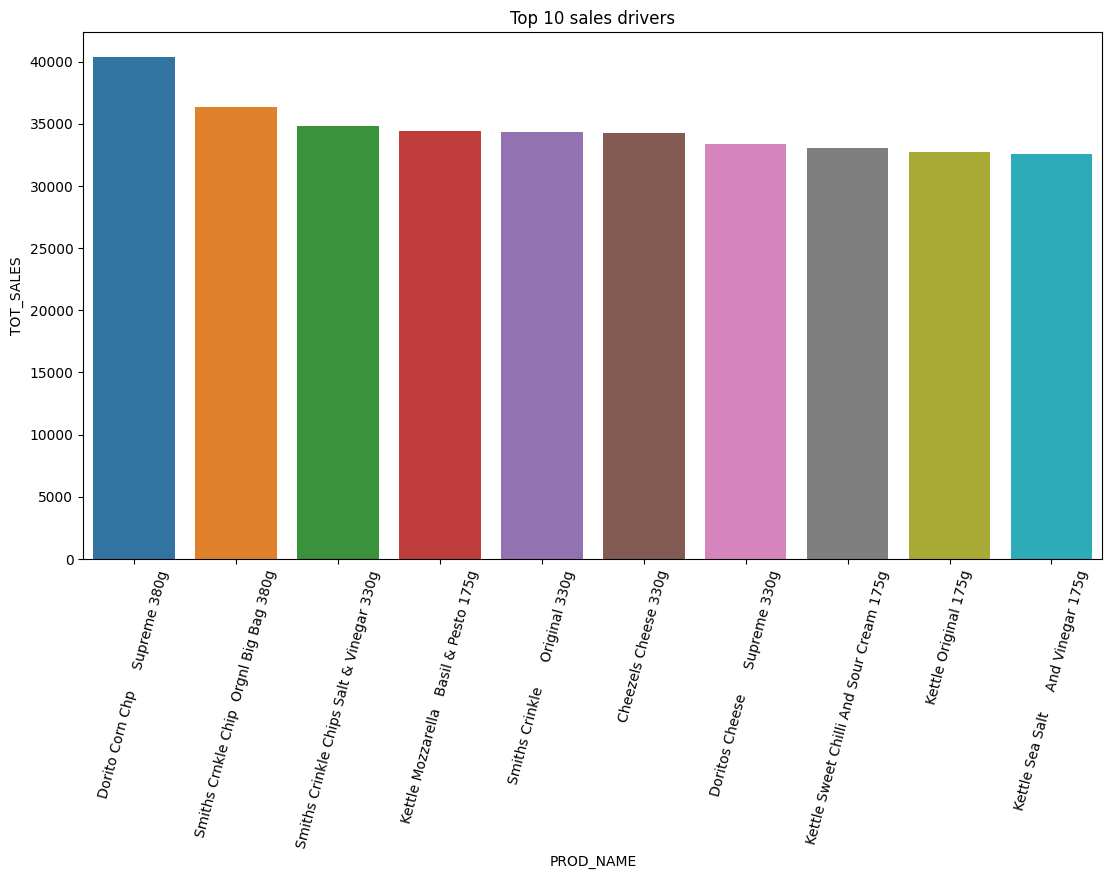

Least 10 sales drivers
                                    PROD_NAME  TOT_SALES
112            Woolworths Medium   Salsa 300g     4050.0
113            Woolworths Mild     Salsa 300g     4234.5
105         WW Crinkle Cut      Original 175g     4532.2
90   Sunbites Whlegrn    Crisps Frch/Onin 90g     4600.2
104          WW Crinkle Cut      Chicken 175g     4702.2
89       Snbts Whlgrn Crisps Cheddr&Mstrd 90g     5076.2
111            Woolworths Cheese   Rings 190g     5169.6
106         WW D/Style Chip     Sea Salt 200g     5249.7
108            WW Original Stacked Chips 160g     5323.8
109    WW Sour Cream &OnionStacked Chips 160g     5323.8


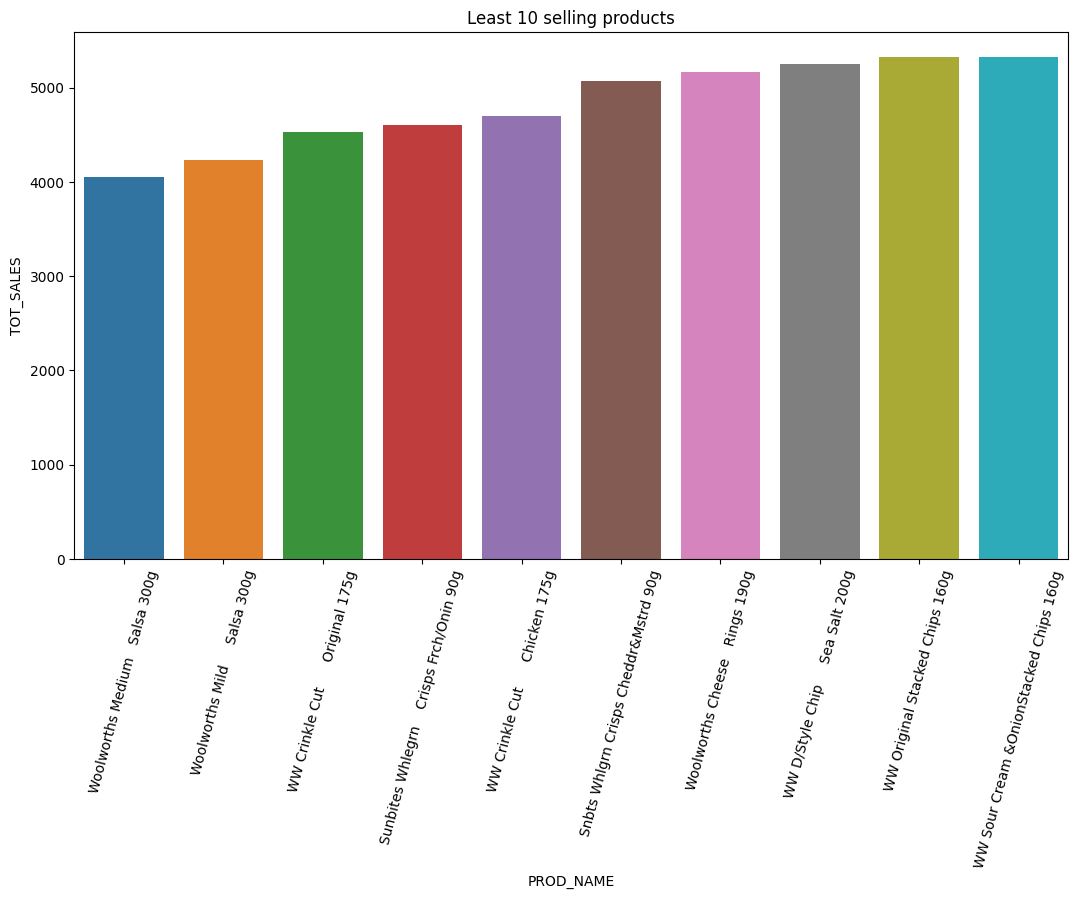

In [88]:
sales_by_product = merged.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
print(sales_by_product)
top_10_by_product = sales_by_product.nlargest(10, 'TOT_SALES')
print(simple_colors.green('Top 10 Products'))
print(top_10_by_product)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_by_product, x='PROD_NAME', y="TOT_SALES", hue='PROD_NAME')
plt.tight_layout()
plt.xticks(rotation=75)
plt.title('Top 10 sales drivers')
plt.show()

least_10_by_product = sales_by_product.nsmallest(10, 'TOT_SALES')
print(simple_colors.red('Least 10 sales drivers'))
print(least_10_by_product)
plt.figure(figsize=(12, 6))
sns.barplot(data=least_10_by_product, x='PROD_NAME', y="TOT_SALES", hue='PROD_NAME')
plt.tight_layout()
plt.xticks(rotation=75)
plt.title('Least 10 selling products')
plt.show()

     PROD_QTY                         PROD_NAME  TOT_SALES
553       200  Dorito Corn Chp     Supreme 380g     1300.0
444         5                 Burger Rings 220g       80.5
445         5          CCs Nacho Cheese    175g       21.0
446         5                 CCs Original 175g       31.5
447         5          CCs Tasty Cheese    175g       21.0
448         5    Cheetos Chs & Bacon Balls 190g       16.5
449         5                Cheetos Puffs 165g       70.0
450         5              Cheezels Cheese 330g      114.0
451         5          Cheezels Cheese Box 125g       21.0
452         5    Cobs Popd Sea Salt  Chips 110g       95.0


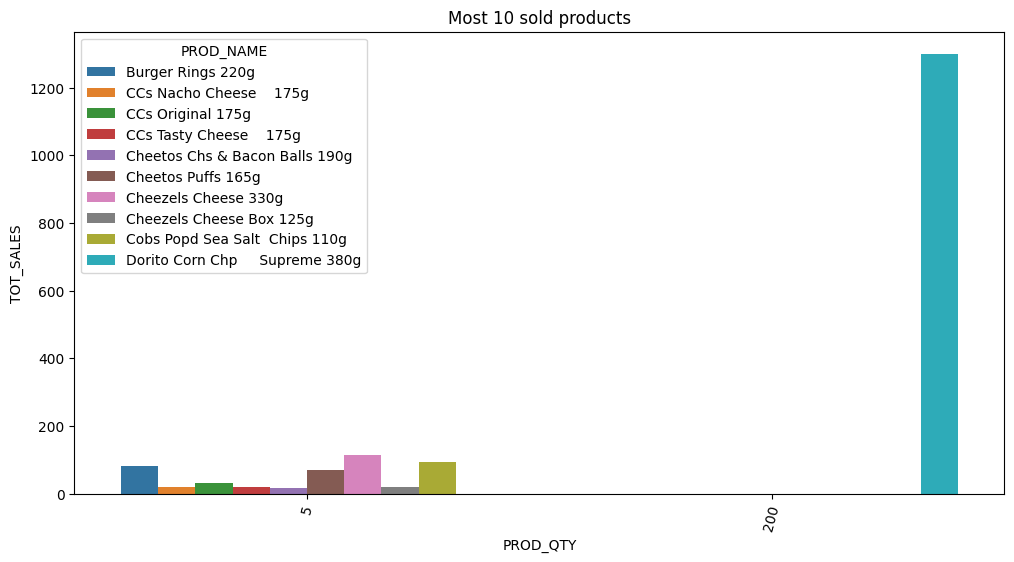

   PROD_QTY                               PROD_NAME  TOT_SALES
0         1                       Burger Rings 220g      427.8
1         1                CCs Nacho Cheese    175g      359.1
2         1                       CCs Original 175g      348.6
3         1                CCs Tasty Cheese    175g      430.5
4         1          Cheetos Chs & Bacon Balls 190g      587.4
5         1                      Cheetos Puffs 165g      529.2
6         1                    Cheezels Cheese 330g     1812.6
7         1                Cheezels Cheese Box 125g      399.0
8         1          Cobs Popd Sea Salt  Chips 110g     1045.0
9         1  Cobs Popd Sour Crm  &Chives Chips 110g     1178.0


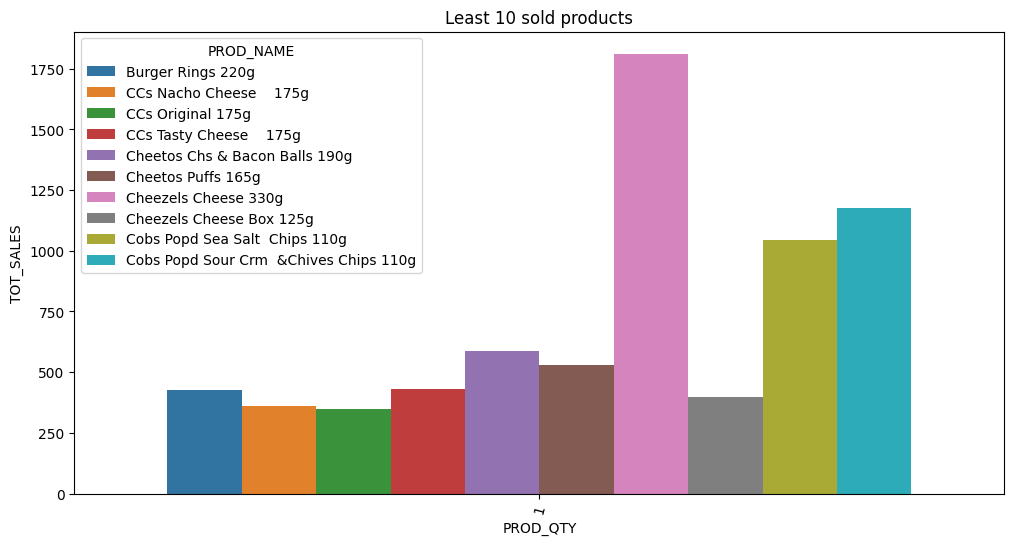

In [27]:
#Analysing and visualising pack sizes
pack_size_sales = merged.groupby(['PROD_QTY', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()
top_10_by_pack = pack_size_sales.nlargest(10, 'PROD_QTY')
print(top_10_by_pack)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_by_pack, x='PROD_QTY', y="TOT_SALES", hue='PROD_NAME')
plt.xticks(rotation=75)
plt.title('Most 10 sold products')
plt.show()

least_10_by_pack = pack_size_sales.nsmallest(10, 'PROD_QTY')
print(least_10_by_pack)
plt.figure(figsize=(12, 6))
sns.barplot(data=least_10_by_pack, x='PROD_QTY', y="TOT_SALES", hue='PROD_NAME')
plt.xticks(rotation=75)
plt.title('Least 10 sold products')
plt.show()

Weight Units:  ['g' nan]


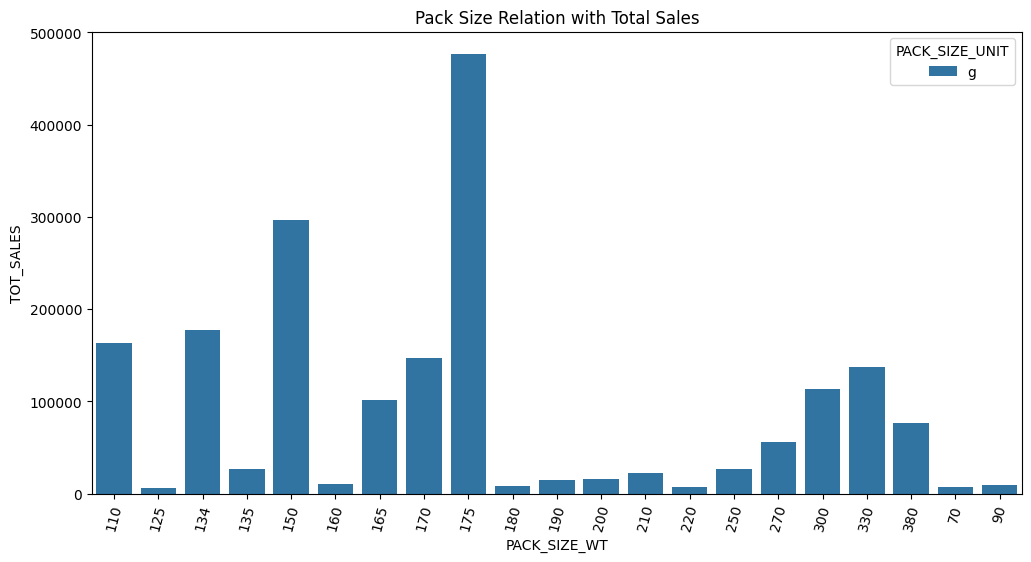

In [28]:
pack_size = merged['PROD_NAME'].str.extract('(\d+)\s*(g|kg)')
merged['PACK_SIZE_WT'] = pack_size[0] 
merged['PACK_SIZE_UNIT'] = pack_size[1] 
print("Weight Units: ", merged['PACK_SIZE_UNIT'].unique())

pack_size_group = merged.groupby(['PACK_SIZE_WT', 'PACK_SIZE_UNIT'])['TOT_SALES'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=pack_size_group, x='PACK_SIZE_WT', y="TOT_SALES", hue='PACK_SIZE_UNIT')
plt.xticks(rotation=75)
plt.title('Pack Size Relation with Total Sales')
plt.show()

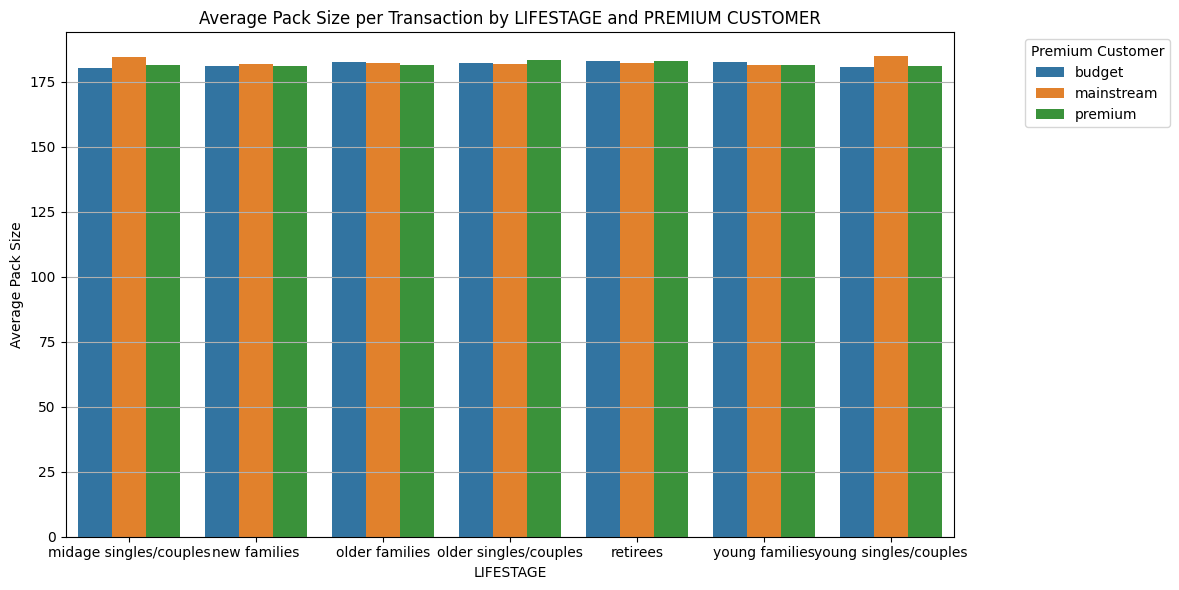

In [49]:
merged['PACK_SIZE_WT'] = pd.to_numeric(merged['PACK_SIZE_WT'], errors='coerce')
pack_size_by_lifestage_premium = merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PACK_SIZE_WT'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=pack_size_by_lifestage_premium, x='LIFESTAGE', y="PACK_SIZE_WT", hue='PREMIUM_CUSTOMER')
plt.title('Average Pack Size per Transaction by LIFESTAGE and PREMIUM CUSTOMER')
plt.ylabel('Average Pack Size')
plt.xlabel('LIFESTAGE')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Premium Customer', loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

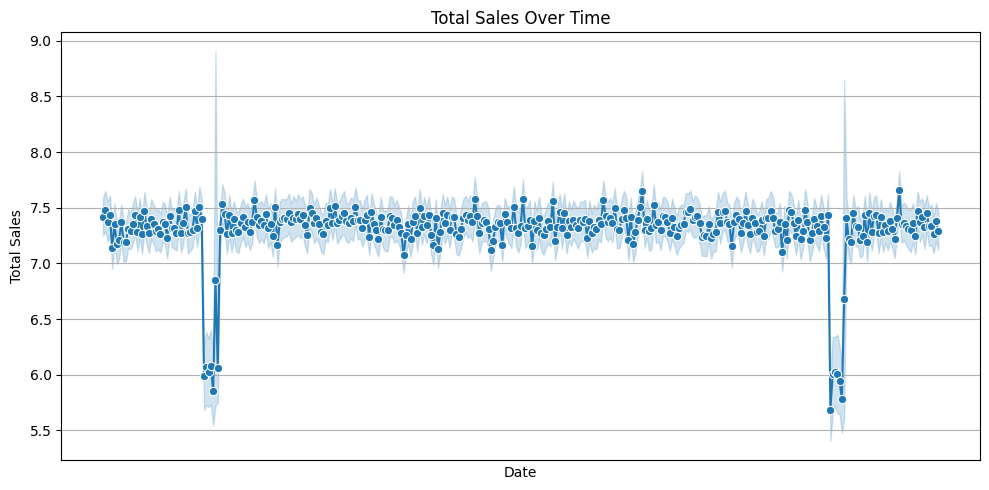

In [53]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))  # Set the figure size
sns.lineplot(x='DATE', y='TOT_SALES', data=merged, marker='o')
plt.title('Total Sales Over Time')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Total Sales')  # Y-axis label
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Change interval as needed
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()  # Optional: add a grid for easier reading
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [29]:
#Storing used data
merged.to_csv("E:/WPI/Fall_2024/CS539_MachineLearning/Assignments/1/datasets/2_transaction_and_purchase_behavior/merged.csv")